In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
import pickle
from sklearn.externals import joblib
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import os 

   btio-pnetcdf-1.1.1  100-100-100-2  124.56   114.44   0.92   15.69  \
0  btio-pnetcdf-1.1.1  400-400-400-4  323.79  2441.41   7.54  797.87   
1  btio-pnetcdf-1.1.1  200-200-200-2  246.41   915.53   3.72  622.09   
2  btio-pnetcdf-1.1.1  500-500-500-2   84.99  4768.37  56.11  347.13   
3  btio-pnetcdf-1.1.1  100-100-100-2  208.75   114.44   0.55   19.90   
4  btio-pnetcdf-1.1.1  200-200-200-4  147.17   305.18   2.07   55.02   

   114.44.1   7.29  12255232  20  disable disable.1 disable.2 disable.3  \
0   2441.41   3.06   6946816  30   enable    enable   disable    enable   
1    915.53   1.47  22151168  37   enable   disable   disable    enable   
2   4768.37  13.74   1179648  28  disable   disable   disable    enable   
3    114.44   5.75  15138816   5   enable    enable   disable   disable   
4    305.18   5.55   8257536  29   enable   disable   disable   disable   

   127926272  
0  233832448  
1  449839104  
2  112197632  
3  163577856  
4  140509184  


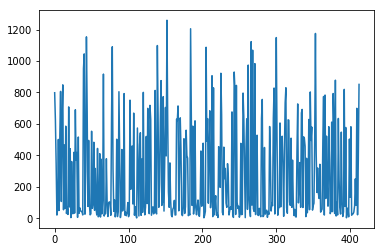

In [91]:
projectdir = "/home/dsinghvi/sem8/parallel/project/CS633-2018-19-2-project/progress/"
data = pd.read_csv('../BTIOstats.txt', delim_whitespace=True)
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))
data.iloc[:,5].plot()

In [92]:
array = data.values

print(data.head())
print(data.shape)
data.columns=['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14','col15']
z = data['col2'].str.split('-')
print(z.head())
data['col11']=data['col11'].eq("enable").mul(1)
data['col12']=data['col12'].eq("enable").mul(1)
data['col13']=data['col13'].eq("enable").mul(1)
data['col14']=data['col14'].eq("enable").mul(1)

   btio-pnetcdf-1.1.1  100-100-100-2  124.56   114.44   0.92   15.69  \
0  btio-pnetcdf-1.1.1  400-400-400-4  323.79  2441.41   7.54  797.87   
1  btio-pnetcdf-1.1.1  200-200-200-2  246.41   915.53   3.72  622.09   
2  btio-pnetcdf-1.1.1  500-500-500-2   84.99  4768.37  56.11  347.13   
3  btio-pnetcdf-1.1.1  100-100-100-2  208.75   114.44   0.55   19.90   
4  btio-pnetcdf-1.1.1  200-200-200-4  147.17   305.18   2.07   55.02   

   114.44.1   7.29  12255232  20  disable disable.1 disable.2 disable.3  \
0   2441.41   3.06   6946816  30   enable    enable   disable    enable   
1    915.53   1.47  22151168  37   enable   disable   disable    enable   
2   4768.37  13.74   1179648  28  disable   disable   disable    enable   
3    114.44   5.75  15138816   5   enable    enable   disable   disable   
4    305.18   5.55   8257536  29   enable   disable   disable   disable   

   127926272  
0  233832448  
1  449839104  
2  112197632  
3  163577856  
4  140509184  
(413, 15)
0    [400, 400, 

In [93]:
X = pd.DataFrame(z.tolist())

#FEATURES
X['cb3']=data['col11']
X['cb4']=data['col12']
X['cb5']=data['col13']
X['cb6']=data['col14']
X['cb1']=data['col9']
X['cb2']=data['col10']
X['cb7']=data['col15']
#NORMALIZING 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(X_scaled)

print(type(X))
print(X.head())
X_total = X
#pd.options.display.max_rows=  1500


<class 'pandas.core.frame.DataFrame'>
     0     1     2         3    4    5    6    7      8         9         10
0  0.75  0.75  0.75  0.142857  1.0  1.0  0.0  1.0  0.212  0.202703  0.439604
1  0.25  0.25  0.25  0.000000  1.0  0.0  0.0  1.0  0.676  0.250000  0.847525
2  1.00  1.00  1.00  0.000000  0.0  0.0  0.0  1.0  0.036  0.189189  0.209901
3  0.00  0.00  0.00  0.000000  1.0  1.0  0.0  0.0  0.462  0.033784  0.306931
4  0.25  0.25  0.25  0.142857  1.0  0.0  0.0  0.0  0.252  0.195946  0.263366


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [94]:
Y = data['col6']
#Y = ((data['col7'])*1024)/data['col6'] + (data['col4']*1024)/data['col3']
Y=Y.values
Y = Y.astype(int)
print(Y[0:5])
import xgboost as xgb
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_total,Y,test_size=0.7,random_state = 42) 
y = train_Y
X = train_X
print(X[0:5])
print(y.shape, X.shape)
print(test_X.shape,test_Y.shape)
print(y[0:5])



[797 622 347  19  55]
       0     1     2         3    4    5    6    7      8         9         10
4    0.25  0.25  0.25  0.142857  1.0  0.0  0.0  0.0  0.252  0.195946  0.263366
256  0.50  0.50  0.50  0.142857  0.0  1.0  1.0  1.0  0.198  0.141892  0.308911
369  0.00  0.00  0.00  0.000000  1.0  0.0  1.0  1.0  0.752  0.209459  0.196040
100  0.00  0.00  0.00  1.000000  0.0  0.0  1.0  0.0  0.296  0.074324  0.043564
226  0.25  0.25  0.25  0.428571  0.0  0.0  0.0  1.0  0.386  0.033784  0.120792
(123,) (123, 11)
(290, 11) (290,)
[ 55 647 198   9 657]


In [86]:
xgb_model =xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)
y_pred = xgb_model.predict(test_X)

mse=mean_squared_error(test_Y, y_pred)
print(np.sqrt(mse))

135.3748401397262


In [87]:
#print(test_Y)
from sklearn.metrics import r2_score
r2_score(test_Y,y_pred)

0.8161947061567562

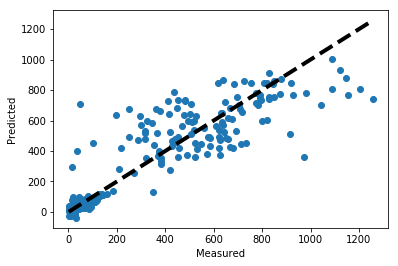

In [88]:
fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred)
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [89]:
# save the model to disk

modelfile = 'btiofinalxgb.sav'
joblib.dump(xgb_model, open(modelfile, 'wb'))
scaler_filename = "btioscalerxgb.save"
joblib.dump(min_max_scaler, scaler_filename) 


['btioscalerxgb.save']

In [19]:
# ##### TESTING CODE FOR THIS MODEL


# import json
# with open(projectdir+'confex.json') as f:
#     data = json.load(f)

# romio_ds_read = data["mpi"]["romio_ds_read"] == "enable"
# romio_ds_write = data["mpi"]["romio_ds_write"] == "enable"
# romio_cb_read = data["mpi"]["romio_cb_read"]
# romio_cb_write = data["mpi"]["romio_cb_write"]
# cb_buffer_size = data["mpi"]["cb_buffer_size"]
# stripe_size = data["lfs"]["setstripe"]["size"]
# stripe_count = data["lfs"]["setstripe"]["count"]

# col_names =  ['cb5','cb6','cb7','cb8','cb8','cb10','cb11','cb12']
# cb_df  = pd.DataFrame(columns = col_names)
# cb_df.loc[len(cb_df)] = [romio_ds_read,romio_ds_write,stripe_size, stripe_count, cb_buffer_size,"50","50","50"]


# scaler_filename = "scalerxgb.save"
# scaler = joblib.load(scaler_filename)
# xgb_model = joblib.load(modelfile)

# print(test_X.head(1))


# col_names =  ['f0','1', '2','3','4','5']
# my_df = pd.DataFrame(columns=col_names)
# my_df.loc[len(my_df)] = [100,100,100,2,2,4]

# x = pd.concat([my_df,cb_df], axis=1)
# norm_df = pd.DataFrame(scaler.transform(x))
# print(norm_df)

# xgb_model.predict(norm_df)
# x
# test_X.head(1)
# trees.predict(test_X.head(1))